In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator
import collections
from itertools import chain
import ast
import os

# get campaigns
cwd = os.getcwd()
os.chdir("..")
campaigns = pd.read_csv(os.getcwd() + 'data/updated_csv_filtered_FINAL.csv')

# Number of Campaigns per Keyword
The following code generates a figure that plots each keyword with the number of campaigns associated with that keyword.

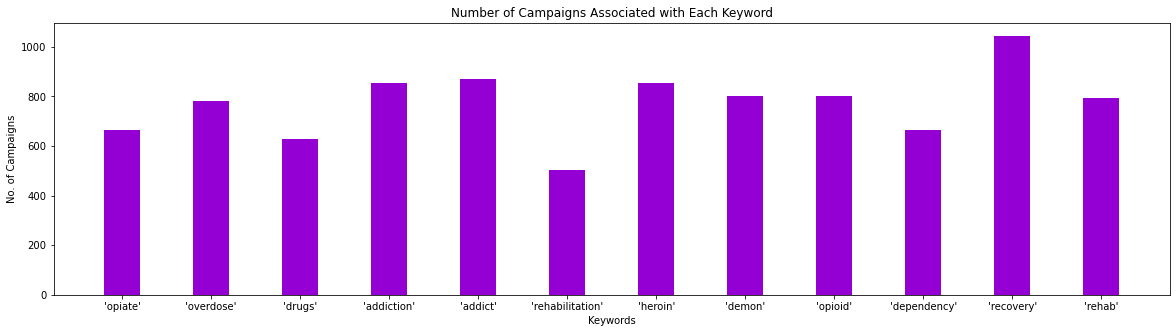

In [3]:
# get all of the keywords
keywords = campaigns['All_Keywords']

# get the number of keywords mentioned for each keyword
keywords = keywords.to_list()
keywords = [i.strip("[]").split(", ") for i in keywords]
keywords = list(chain.from_iterable(keywords))

counter = collections.Counter(keywords)
 
# create the bar plot
keyword = list(counter.keys())
values = list(counter.values())
  
fig = plt.figure(figsize = (20, 5))
plt.bar(keyword, values, color ='darkviolet',
        width = 0.4)
 
plt.xlabel("Keywords")
plt.ylabel("No. of Campaigns")
plt.title("Number of Campaigns Associated with Each Keyword")
plt.show()

# Number of Campaigns per Tag
The following code generates figures that plot each tag against the number of campaigns associated with that tag. Since there are a lot of tags, the results are split into separate figures.

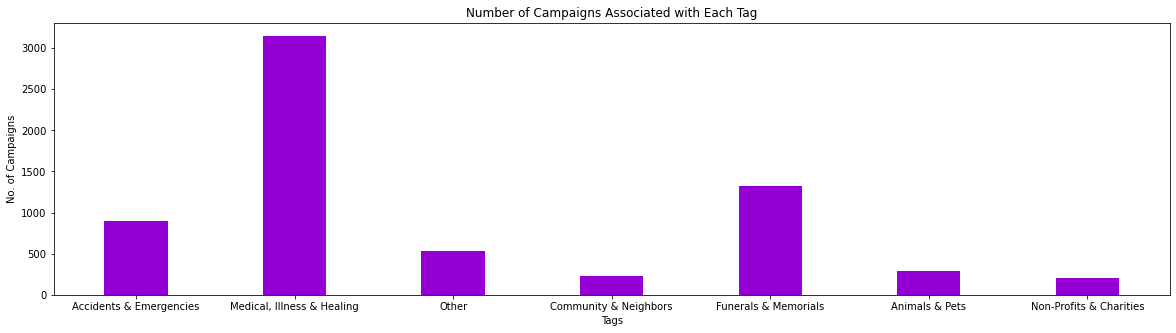

In [4]:
# get all of the tags
tags = campaigns['Reason_For_Fund']
tags = tags.to_list()

# get tag count
counter = collections.Counter(tags)
 
# create the bar plot

# this figure includes the following 7 keywords:
# Accidents & Emergencies
# Medical, Illness & Healing
# Other
# Community & Neighbors
# Funerals & Memorials
# Animals & Pets
# Non-Profits & Charities

tag = list(counter.keys())
values = list(counter.values())
  
fig = plt.figure(figsize = (20, 5))
plt.bar(tag[:7], values[:7], color ='darkviolet',
        width = 0.4)
 
plt.xlabel("Tags")
plt.ylabel("No. of Campaigns")
plt.title("Number of Campaigns Associated with Each Tag")
plt.show()

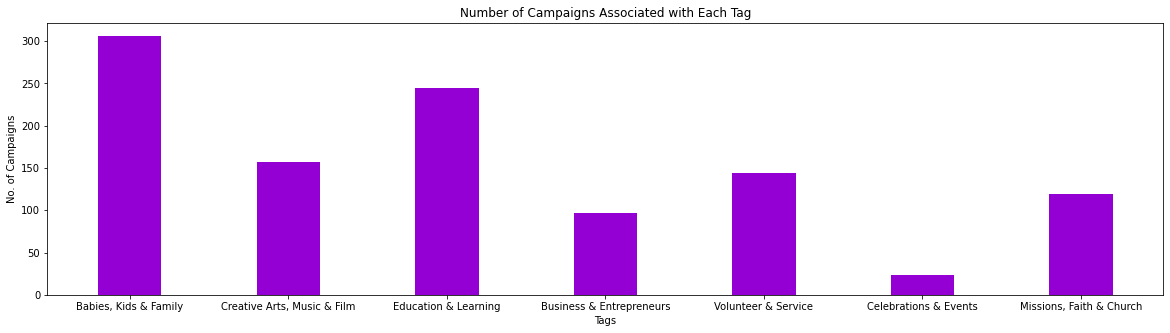

In [5]:
# create the bar plot
# this figure includes the following 7 keywords:

# Babies, Kids & Family
# Creative Arts, Music & Film
# Education & Learning
# Business & Entrepreneurs
# Volunteer & Service
# Celebrations & Events
# Missions, Faith & Church

plt.bar(tag[7:14], values[7:14], color ='darkviolet',
        width = 0.4)
 
plt.xlabel("Tags")
plt.ylabel("No. of Campaigns")
plt.title("Number of Campaigns Associated with Each Tag")
plt.show()

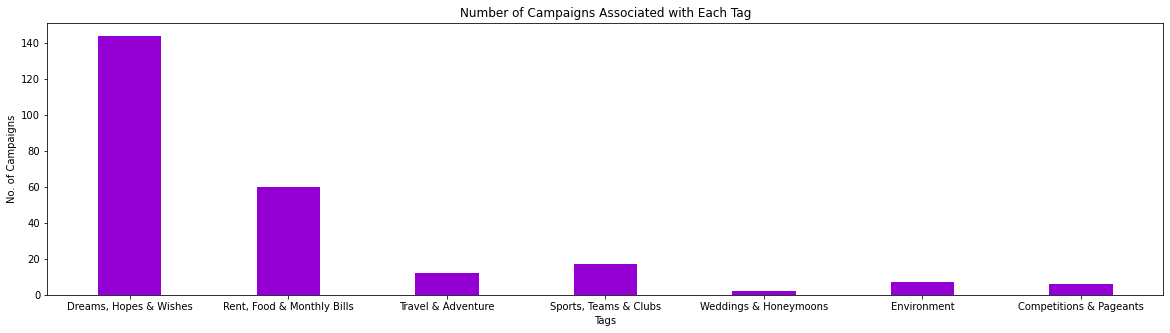

In [6]:
# create the bar plot
# this figure includes the following 7 keywords:

# Dreams, Hopes & Wishes
# Rent, Food & Monthly Bills
# Travel & Adventure
# Sports, Teams, & Clubs
# Weddings & Honeymoons
# Environment
# Competitions & Pageants

plt.bar(tag[14:], values[14:], color ='darkviolet',
        width = 0.4)
 
plt.xlabel("Tags")
plt.ylabel("No. of Campaigns")
plt.title("Number of Campaigns Associated with Each Tag")
plt.show()

# Keyword Popularity Over Time
The following code generates a figure describing how the popularity of each keyword changes over time.

In [103]:
from datetime import datetime

# get campaigns by year
dates = campaigns['Campaign_Date']

start_date = "2021-01-01"
end_date = "2021-12-31"
c_21 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2020-01-01"
end_date = "2020-12-31"
c_20 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2019-01-01"
end_date = "2019-12-31"
c_19 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2018-01-01"
end_date = "2018-12-31"
c_18 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2017-01-01"
end_date = "2017-12-31"
c_17 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2016-01-01"
end_date = "2016-12-31"
c_16 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2015-01-01"
end_date = "2015-12-31"
c_15 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2014-01-01"
end_date = "2014-12-31"
c_14 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2013-01-01"
end_date = "2013-12-31"
c_13 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

start_date = "2012-01-01"
end_date = "2012-12-31"
c_12 = campaigns[(campaigns['Campaign_Date'] >= start_date) & (campaigns['Campaign_Date'] <= end_date)]

In [104]:
campaign_years = [c_12, c_13, c_14, c_15, c_16, c_17, c_18, c_19, c_20, c_21]
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# this function returns the fraction of the total number of campaigns
# in a single year that corresponds to a specific keyword
def get_keyword_popularity(keyword, campaigns):
    keywords = campaigns['All_Keywords']

    # get keyword count
    keywords = keywords.to_list()
    keywords = [i.strip("[]").split(", ") for i in keywords]
    keywords = list(chain.from_iterable(keywords))
    
    # normalize popularity based on number of campaigns that year
    counter = collections.Counter(keywords)
    total = 0
    for k in counter:
        total += counter[k]
    
    return counter[keyword]/total

In [46]:
# this function plots a keyword against its popularity
def plot_keyword(keyword, keyword_title, keyword_counts):
    # create the bar plot
    fig = plt.figure(figsize = (10, 5))
    plt.bar(years, keyword_counts, color ='darkviolet',width = 0.4)

    plt.xlabel("Years")
    plt.ylabel(keyword_title)
    plt.title("Number of Campaigns Mentioning " + keyword + " Over the Years")
    plt.show()

In [64]:
# opiate
opiate_counts = []
for campaign in campaign_years:
    opiate_counts.append(get_keyword_popularity("'opiate'",campaign))
    
# opioid
opioid_counts = []
for campaign in campaign_years:
    opioid_counts.append(get_keyword_popularity("'opioid'",campaign))
    
# drugs
drugs_counts = []
for campaign in campaign_years:
    drugs_counts.append(get_keyword_popularity("'drugs'",campaign))
    
# overdose
overdose_counts = []
for campaign in campaign_years:
    overdose_counts.append(get_keyword_popularity("'overdose'",campaign))
    
# addict
addict_counts = []
for campaign in campaign_years:
    addict_counts.append(get_keyword_popularity("'addict'",campaign))
    
# addiction
addiction_counts = []
for campaign in campaign_years:
    addiction_counts.append(get_keyword_popularity("'addiction'",campaign))
    
# heroin
heroin_counts = []
for campaign in campaign_years:
    heroin_counts.append(get_keyword_popularity("'heroin'",campaign))
    
# demon
demon_counts = []
for campaign in campaign_years:
    demon_counts.append(get_keyword_popularity("'demon'",campaign))
    
# dependency
dependency_counts = []
for campaign in campaign_years:
    dependency_counts.append(get_keyword_popularity("'dependency'",campaign))
    
# rehab
rehab_counts = []
for campaign in campaign_years:
    rehab_counts.append(get_keyword_popularity("'rehab'",campaign))
    
# rehabilitation
rehabilitation_counts = []
for campaign in campaign_years:
    rehabilitation_counts.append(get_keyword_popularity("'rehabilitation'",campaign))
    
# recovery
recovery_counts = []
for campaign in campaign_years:
    recovery_counts.append(get_keyword_popularity("'recovery'",campaign))

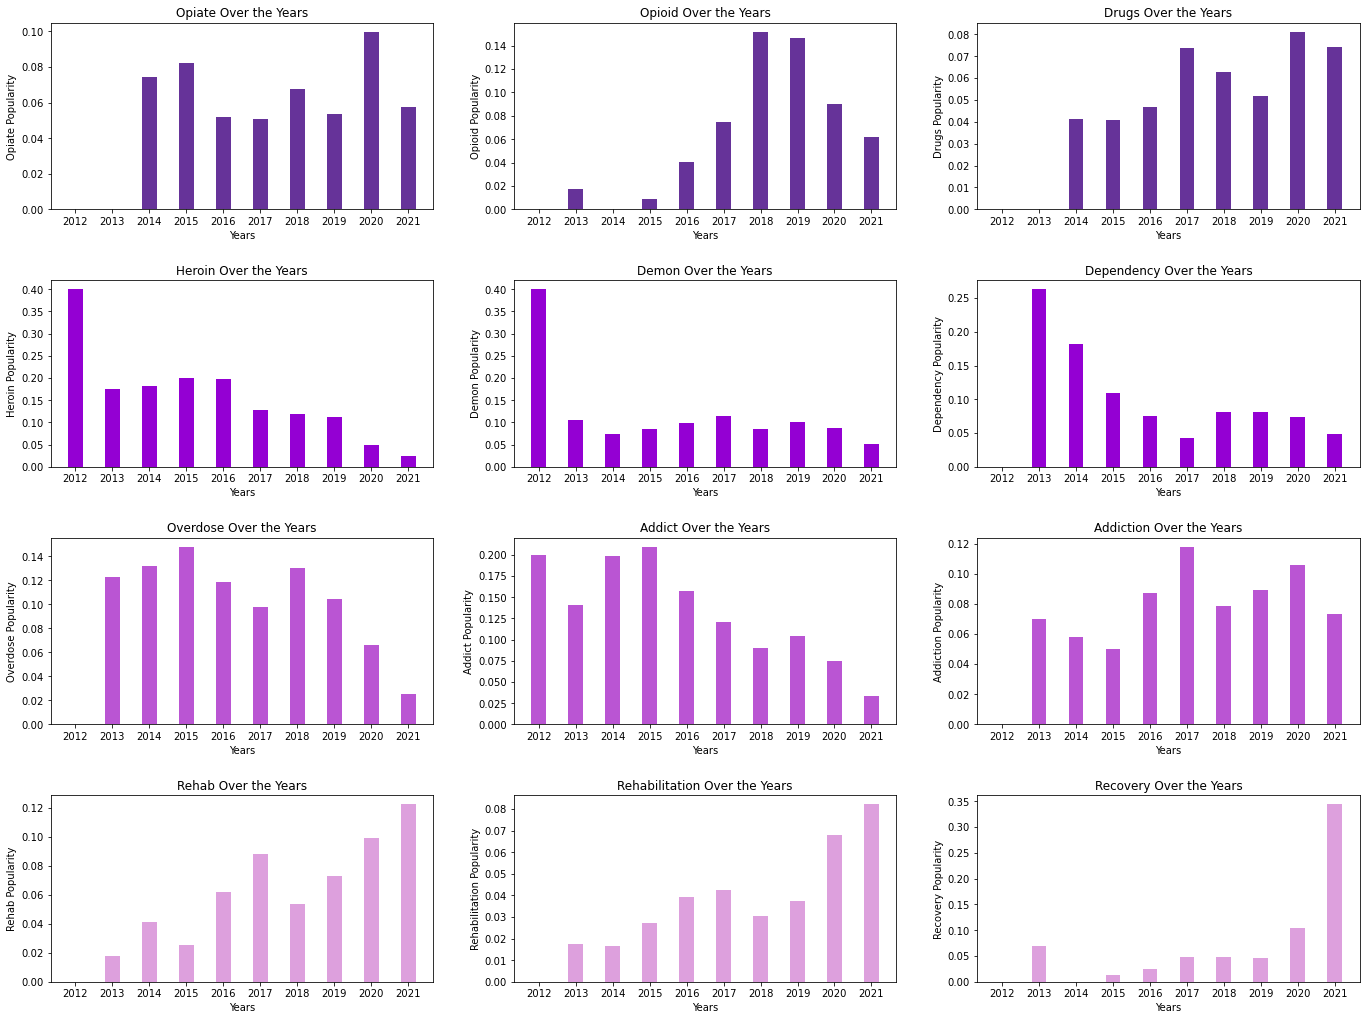

In [85]:
fig, axs = plt.subplots(4, 3)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.tight_layout(pad=5.0)

# creating the bar plot
axs[0,0].bar(years, opiate_counts, color ='rebeccapurple',width = 0.4)
axs[0,0].set(xlabel="Years", ylabel='Opiate Popularity', 
             title="Opiate Over the Years")

axs[0,1].bar(years, opioid_counts, color ='rebeccapurple',width = 0.4)
axs[0,1].set(xlabel="Years", ylabel='Opioid Popularity', 
             title="Opioid Over the Years")

axs[0,2].bar(years, drugs_counts, color ='rebeccapurple',width = 0.4)
axs[0,2].set(xlabel="Years", ylabel='Drugs Popularity', 
             title="Drugs Over the Years")

axs[2,0].bar(years, overdose_counts, color ='mediumorchid',width = 0.4)
axs[2,0].set(xlabel="Years", ylabel='Overdose Popularity', 
             title="Overdose Over the Years")

axs[2,1].bar(years, addict_counts, color ='mediumorchid',width = 0.4)
axs[2,1].set(xlabel="Years", ylabel='Addict Popularity', 
             title="Addict Over the Years")

axs[2,2].bar(years, addiction_counts, color ='mediumorchid',width = 0.4)
axs[2,2].set(xlabel="Years", ylabel='Addiction Popularity', 
             title="Addiction Over the Years")

axs[1,0].bar(years, heroin_counts, color ='darkviolet',width = 0.4)
axs[1,0].set(xlabel="Years", ylabel='Heroin Popularity', 
             title="Heroin Over the Years")

axs[1,1].bar(years, demon_counts, color ='darkviolet',width = 0.4)
axs[1,1].set(xlabel="Years", ylabel='Demon Popularity', 
             title="Demon Over the Years")

axs[1,2].bar(years, dependency_counts, color ='darkviolet',width = 0.4)
axs[1,2].set(xlabel="Years", ylabel='Dependency Popularity', 
             title="Dependency Over the Years")

axs[3,0].bar(years, rehab_counts, color ='plum',width = 0.4)
axs[3,0].set(xlabel="Years", ylabel='Rehab Popularity', 
             title="Rehab Over the Years")

axs[3,1].bar(years, rehabilitation_counts, color ='plum',width = 0.4)
axs[3,1].set(xlabel="Years", ylabel='Rehabilitation Popularity', 
             title="Rehabilitation Over the Years")

axs[3,2].bar(years, recovery_counts, color ='plum',width = 0.4)
axs[3,2].set(xlabel="Years", ylabel='Recovery Popularity', 
             title="Recovery Over the Years")
plt.show()

# Amount Raised Over Time
The following code generates a figure that plots the median amount of money raised against each year

In [110]:
# this function returns the average amount of money raised in a year
def get_amount_raised(campaign):
    raised = np.array(campaign['Total_Raised'])
    average = np.nanmedian(raised)
    return average

In [115]:
# this function plots each year against the median amount of money
# raised that year
def plot_amount(total_raised):
    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(years, total_raised, color ='darkviolet',width = 0.4)

    plt.xlabel("Years")
    plt.ylabel("Amount")
    plt.title("Median Raised Over the Years")
    plt.show()

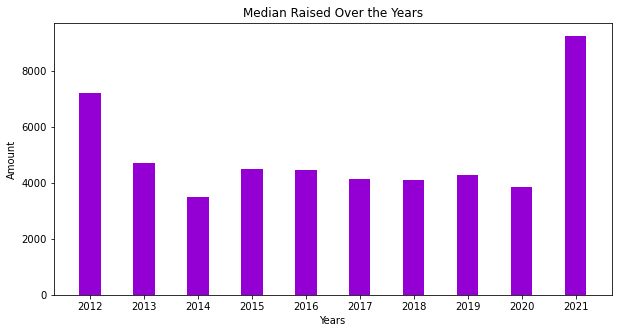

In [116]:
# get the average amount raised for each year
ave_raised = []
for campaign in campaign_years:
    ave_raised.append(get_amount_raised(campaign))
    
plot_amount(ave_raised)